# Forced System of Diff Eq
Examplese here are implemented in two ways. First, I'll be using more standard Python libraries and syntax, and second I'll use the [control](https://github.com/python-control/python-control) package to implent state-space control experiemnts in more Matlab-y syntax.

Systems are simulated as  x_dot = Ax + Bu, where A is the transformation matrix, x, is the state of the system, B is the initial condition, and u is the input to the system. 

For our purposes, we want to simulate the system as y = Cx + Du

For these examples, A is the state matrix (Jacobian derived from linearlizing near the fixed points), B corresponds to the initial conditions of the system (e.g. the amplitue of an inout pulse at t = 0) - can alo be thought of as the input conditions, C, the putput matrix of the state-space system, is set to the identity, and D, the feedthrough matrix of the state-space system is set to a matrix of zeros.

In [1]:
# Method One - libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, impulse, lsim

In [2]:
# Method One - define the dynamical matrices
A = np.array([[0, 1], [-1, -0.1]]) # added small damping (-0.1 omega)
B = np.array([[0], [1]])
C = np.eye(2)
D = np.array([[0], [0]])

In [3]:
# Method One - create a state space model
sys = StateSpace(A, B, C, D)

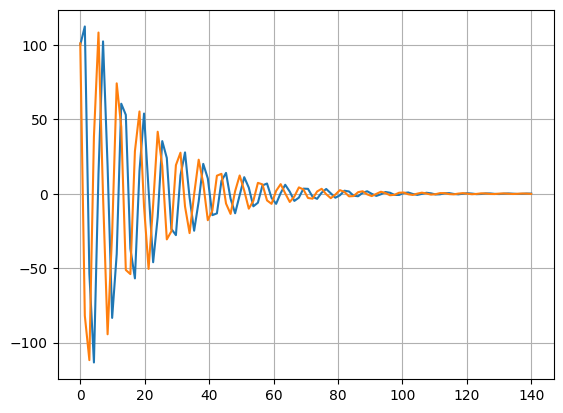

In [4]:
# Method One - send an impulse to the system
t_impulse, y_impulse = impulse(sys, 100)
plt.plot(t_impulse, y_impulse)
plt.grid(True)
plt.show()

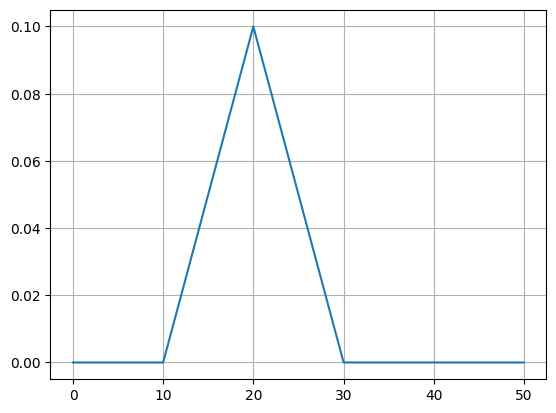

In [5]:
# Method One - create a custom control input
t = np.linspace(0, 50, 5000)
u = 0 * t
u[1000:2000] = np.arange(1, 1001) / 10000
u[2000:3000] = (1000 - np.arange(1, 1001)) / 10000
plt.plot(t, u)
plt.grid(True)
plt.show()

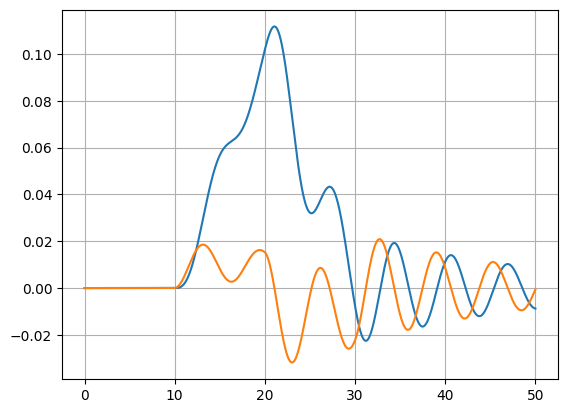

In [6]:
# Method One - perturb the system with the custom input
t_lsim, y_lsim, _ = lsim(sys, u, t)
plt.plot(t_lsim, y_lsim)
plt.grid(True)
plt.show()

In [7]:
# Method Two - import libraries & set up plots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from control.matlab import *
from scipy import signal

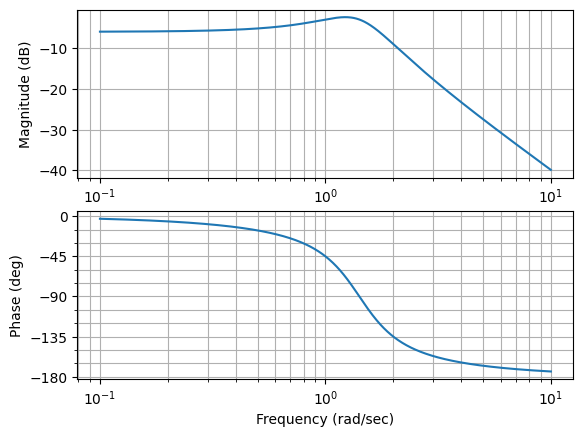

In [8]:
s = tf(np.array([1, 0]), np.array([0, 1]))
G = 1 / (s**2 + s + 2)
w, mag, phase = bode(G)

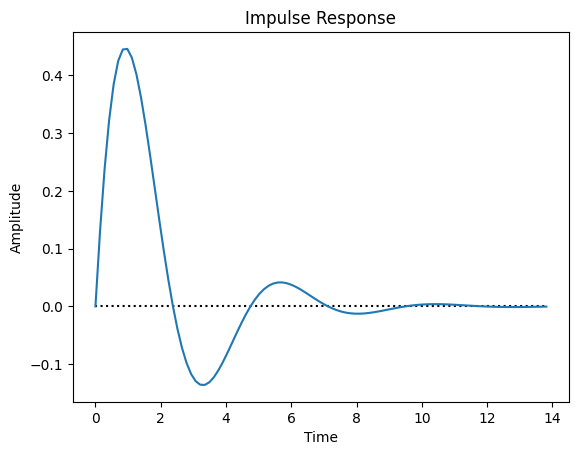

In [9]:
A = np.array([[0, 1], [-2, -1]])
B = np.array([0,1]).reshape((2, 1))
C = np.array([1, 0])
D = 0
G = ss2tf(A, B, C, D)

ia, it = impulse(G)

plt.plot(it[[0, -1]],np.array([0, 0]), 'k:')
plt.plot(it, ia)
plt.title('Impulse Response')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()